**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.sparse.linalg import svds

In [2]:
#Loading data
books = pd.read_csv("Data/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Install\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:30

In [3]:
users = pd.read_csv('Data/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [4]:
ratings = pd.read_csv('Data/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

### Check no.of records and features given in each dataset

In [5]:
books.shape, users.shape, ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
 users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Exploring books dataset

In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [10]:
books.drop(columns=['imageUrlS', 'imageUrlM', 'imageUrlL'], inplace=True)

In [11]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [12]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [13]:
books.loc[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [14]:
books.loc[books['yearOfPublication'] == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [15]:
books.drop(books.loc[books['yearOfPublication'] == 'DK Publishing Inc'].index,  inplace=True)

In [16]:
books.drop(books.loc[books['yearOfPublication'] == 'Gallimard'].index,  inplace=True)

### Change the datatype of yearOfPublication to 'int'

In [17]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [18]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication)

In [19]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [20]:
len(books.loc[books.yearOfPublication == 0])

4618

### There are books with yearOfPublication as 0. Setting the year as mean value for those books

In [21]:
books.loc[books.yearOfPublication == 0, 'yearOfPublication'] = round(books.yearOfPublication.mean())

In [22]:
books.loc[books.yearOfPublication == 0]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [23]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1960, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910,
       1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010,
       1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378, 1919,
       1922, 1897, 2024, 1376, 2037], dtype=int64)

In [24]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [25]:
books.loc[books.publisher.isnull()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [26]:
books.drop(books.loc[books.publisher.isnull() == True].index, inplace=True)

In [27]:
books.loc[books.publisher.isnull()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


There are no NaNs in publisher column

## Exploring Users dataset

In [28]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [29]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [30]:
np.sort(users.Age.unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [31]:
users.loc[users.Age < 5, 'Age'] = np.nan

In [32]:
users.loc[users.Age > 90, 'Age'] = np.nan

In [33]:
users.Age.unique()

array([nan, 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62.,
       63., 27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59.,
       48., 72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12.,
       74., 75., 76., 83., 68., 11., 77., 70.,  8.,  7., 81., 10.,  5.,
        6., 84., 82., 90., 85., 86., 87., 89., 88.])

### Replace null values in column `Age` with mean

In [34]:
mean_age = users.loc[users.Age.isnull() == False, 'Age'].mean()
round(mean_age)

35

In [35]:
users.loc[users.Age.isnull() == True, 'Age'] = round(mean_age)

In [36]:
users.Age.unique()

array([35., 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59., 48.,
       72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12., 74.,
       75., 76., 83., 68., 11., 77., 70.,  8.,  7., 81., 10.,  5.,  6.,
       84., 82., 90., 85., 86., 87., 89., 88.])

### Change the datatype of `Age` to `int`

In [37]:
users.Age = users.Age.astype('int')

In [38]:
users.Age.dtype

dtype('int32')

In [39]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [40]:
ratings.shape

(1149780, 3)

In [41]:
n_users = users.shape[0]
n_books = books.shape[0]

In [42]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [43]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [44]:
ratings_new.shape

(1031130, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [45]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]

In [46]:
ratings_new.shape

(1031130, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [47]:
ratings_new.bookRating.value_counts()

0     647291
8      91804
10     71225
7      66401
9      60776
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: bookRating, dtype: int64

In [48]:
ratings_new = ratings_new[ratings_new.bookRating != 0]

In [49]:
ratings_new.shape

(383839, 3)

### Find out which rating has been given highest number of times

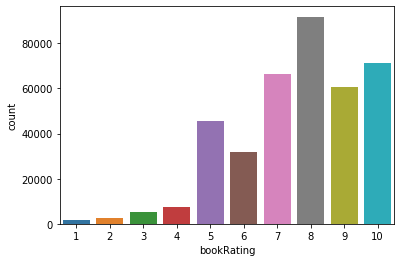

In [50]:
sns.countplot(ratings_new.bookRating)

### Rating 8 has been highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [51]:
user_group = ratings_new.groupby(['userID']).count()

In [52]:
user_group.head()

,ISBN,bookRating
userID,,
8,7,7
9,1,1
12,1,1
14,3,3
16,1,1


In [53]:
user100 = user_group.loc[user_group['bookRating'] >= 100]

In [54]:
user100.index

Int64Index([  2033,   2110,   2276,   4017,   4385,   5582,   6242,   6251,
              6543,   6575,
            ...
            269566, 270713, 271448, 271705, 273113, 274061, 274301, 275970,
            277427, 278418],
           dtype='int64', name='userID', length=449)

In [55]:
ratings_new = ratings_new.loc[ratings_new.userID.isin(user100.index)]

In [56]:
ratings_new.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [57]:
ratings_new.shape

(103269, 3)

In [58]:
ratings_new.loc[ratings_new.bookRating.isnull()]

,userID,ISBN,bookRating


### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [59]:
ratings_new.isnull().any()

userID        False
ISBN          False
bookRating    False
dtype: bool

### There are no NaN values in ratings table

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [60]:
R_df = ratings_new.pivot(index='userID', columns = 'ISBN', values = 'bookRating').fillna(0)

In [61]:
R_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
U, sigma, VT = svds(R_df, k=50)

In [63]:
sigma = np.diag(sigma)

In [64]:
sigma

array([[147.92121613,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.3438051 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07400599, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58327277,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.72875357,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.30978318]])

In [65]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), VT)

In [66]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = R_df.columns)

In [67]:
preds_df.shape

(449, 66572)

In [68]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [69]:
userID = 2110

In [70]:
#user_id = 2 #2nd row in ratings matrix and predicted matrix
user_id = R_df.index.get_loc(userID)
user_id

1

### Creating a new recommend_books function for the given requirement

In [71]:
def recommend_books(predictions_df, userID, user_row_number, books_df, original_ratings_df, num_recommendations = False):
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending = False)
    
    user_data = original_ratings_df[original_ratings_df.userID == (userID)]
    user_full = (user_data.merge(books_df, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False)
                )
    print('User {0} has already rated {1} books.'.format(userID, user_full.dropna().shape[0]))
    print('Recommending the highest {0} predicted ratings books not already rated.'.format(num_recommendations))
    
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, user_data, user_full

In [72]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_books(preds_df, userID, user_id, books, ratings_new, 10)

User 2110 has already rated 103 books.
Recommending the highest 10 predicted ratings books not already rated.


In [73]:
already_rated.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
76,2110,067166865X,10,STAR TREK YESTERDAY'S SON (Star Trek: The Orig...,A.C. Crispin,1988,Audioworks
52,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997,Apple
64,2110,0590629786,10,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic
63,2110,0590629778,10,"The Invasion (Animorphs, No 1)",K. A. Applegate,1996,Scholastic
61,2110,059046678X,10,The Yearbook,Peter Lerangis,1994,Scholastic


### Get the predicted ratings for userID `2110` and sort them in descending order

In [74]:
print('Predicted ratins for userID 2110')
predictions

Predicted ratins for userID 2110


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
2435,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
6048,0451167317,The Dark Half,Stephen King,1994,Signet Book


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [75]:
user_data = ratings_new.loc[ratings_new.userID == 2110]

In [76]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [77]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [78]:
book_data = books.loc[books.ISBN.isin(user_data.ISBN)]

In [79]:
book_data.shape

(103, 5)

In [80]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [81]:
user_full_info = pd.merge(user_data, book_data, left_on='ISBN', right_on='ISBN')

In [82]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [83]:
sorted_user_predictions.shape

(66572,)

In [84]:
sorted_user_predictions.head(10)

ISBN
059035342X    0.682444
0345370775    0.368946
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
0451151259    0.313295
0439139597    0.305088
0439064872    0.290587
0380759497    0.278563
0345353145    0.250941
Name: 1, dtype: float64

### Removing the books which are already read by userID = 2110 i.e. from user_data dataframe

In [85]:
sorted_not_read = sorted_user_predictions.loc[sorted_user_predictions.index.isin(user_data.ISBN) == False]

In [86]:
sorted_not_read.head(10)

ISBN
0345370775    0.368946
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
0451151259    0.313295
0439139597    0.305088
0439064872    0.290587
0380759497    0.278563
0345353145    0.250941
0451167317    0.249254
Name: 1, dtype: float64

In [87]:
top10 = pd.DataFrame(sorted_not_read.head(10).index)

In [88]:
print('Top 10 Recommendations for userID 2110')
pd.merge(top10, books, left_on='ISBN', right_on='ISBN')

Top 10 Recommendations for userID 2110


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
1,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
2,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
3,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
4,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
5,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
6,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
7,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
8,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
9,0451167317,The Dark Half,Stephen King,1994,Signet Book
